In [55]:
import pandas as pd
import numpy as np
import re
from wordcloud import STOPWORDS,WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("New_Delhi_reviews.csv")
data = dataset.copy()



In [46]:
data.shape

(147579, 3)

In [4]:
data.head(20)

,rating_review,review_full
0,5,"Totally in love with the Auro of the place, re..."
1,5,I went this bar 8 days regularly with my husba...
2,5,We were few friends and was a birthday celebra...
3,5,Fatjar Cafe and Market is the perfect place fo...
4,5,"Hey Guys, if you are craving for pizza and sea..."
5,5,We were looking for a special meal and we foun...
6,5,Kailash colony is brimming with small cafes no...
7,5,If you are looking for a varied selection of d...
8,5,Kailash Colony is the place I always head to w...
9,5,Real nice and comfortable bar. I am a whiskey ...


In [5]:
data.isnull().sum()

rating_review    0
review_full      2
dtype: int64

In [6]:
missing_index = data[data.isnull().any(axis=1)].index
data.drop(missing_index,axis=0,inplace=True)
data.reset_index(drop=True,inplace=True)

In [8]:
def avg(x):
    return sum(x) / len(x)

def word_count(w):
    counts = dict()
    words = w.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

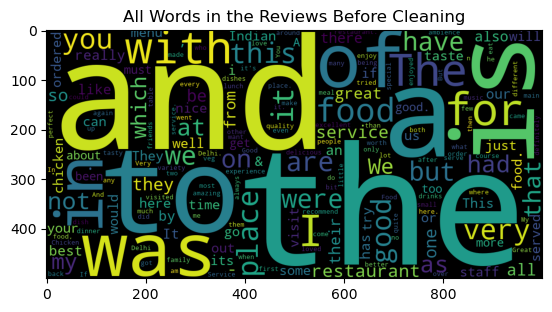

In [63]:
data["word_count"] = data["review_full"].apply(word_count)

count_all = data.review_full.str.split(expand=True).stack().value_counts()

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(count_all)

plt.imshow(wordcloud)
plt.title('All Words in the Reviews Before Cleaning')
plt.savefig("/Users/aniket-/Documents/coding/kaggle/Trip_Advisor_reviews/word_cloud_before_cleaning.png", format="png")
plt.show()

In [11]:
import matplotlib.pyplot as plt
print("Number of different types of reviews")
values = data['rating_review'].value_counts()
values

Number of different types of reviews


5    72389
4    50248
3    15935
2     4552
1     4455
Name: rating_review, dtype: int64

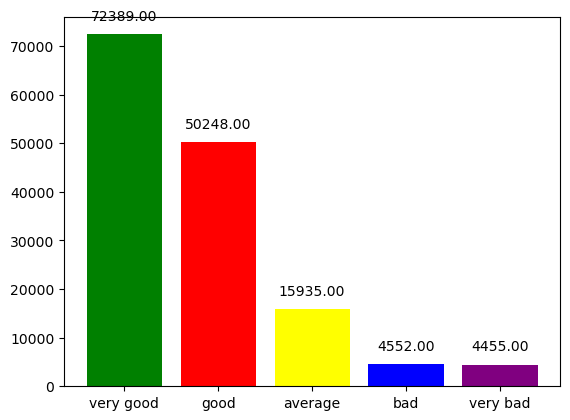

In [15]:
plt.bar(x=["very good", "good", "average",
           "bad", "very bad"], height=values,
       color=["green", "red", "yellow", "blue", "purple"])
for x, y in zip(["very good", "good", "average",
           "bad", "very bad"], values):
    label = "{:.2f}".format(y)
    plt.annotate(label, # text
                 (x,y), # point to label
                 textcoords="offset points", # text position
                 xytext=(0,10), # distance from text to points
                 ha='center') # horizontal alignment
plt.show()

## Data Cleaning

In [22]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [44]:
import re
def tripadvisor_review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review).get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join(meaningful_words))

In [45]:
clean_review = tripadvisor_review_to_words(data["review_full"][0])
print(clean_review)

totally love auro place really beautiful quite fancy time ambience pure gives sense positivity throughout outdoor indoor interior quite quaint cute love open kitchen idea whole marketplace ideology due coronovirus specifically use disposable cutlery keep pandemic mind taking precautionary measures beginning place mask staff using good sanitisation food really amazing specially pizza straight oven hummus pita bread quite delicious looking classy yet soothing italian place delhi fatjar go


In [51]:
data["parsedclean_review"] = data["review_full"].apply(tripadvisor_review_to_words)

/Users/aniket-/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [53]:
data.head(20)

,rating_review,review_full,word_count,parsedclean_review
0,5,"Totally in love with the Auro of the place, re...","{'Totally': 1, 'in': 3, 'love': 1, 'with': 2, ...",totally love auro place really beautiful quite...
1,5,I went this bar 8 days regularly with my husba...,"{'I': 1, 'went': 1, 'this': 1, 'bar': 1, '8': ...",went bar days regularly husband fully satisfie...
2,5,We were few friends and was a birthday celebra...,"{'We': 2, 'were': 1, 'few': 1, 'friends': 1, '...",friends birthday celebration food good taste r...
3,5,Fatjar Cafe and Market is the perfect place fo...,"{'Fatjar': 1, 'Cafe': 1, 'and': 4, 'Market': 1...",fatjar cafe market perfect place casual lunch ...
4,5,"Hey Guys, if you are craving for pizza and sea...","{'Hey': 1, 'Guys,': 1, 'if': 1, 'you': 3, 'are...",hey guys craving pizza searching visit cafe ye...
5,5,We were looking for a special meal and we foun...,"{'We': 1, 'were': 1, 'looking': 2, 'for': 2, '...",looking special meal found fatjar well present...
6,5,Kailash colony is brimming with small cafes no...,"{'Kailash': 1, 'colony': 1, 'is': 2, 'brimming...",kailash colony brimming small cafes happened v...
7,5,If you are looking for a varied selection of d...,"{'If': 1, 'you': 2, 'are': 3, 'looking': 1, 'f...",looking varied selection delicious high qualit...
8,5,Kailash Colony is the place I always head to w...,"{'Kailash': 1, 'Colony': 1, 'is': 10, 'the': 2...",kailash colony place always head mood gk nehru...
9,5,Real nice and comfortable bar. I am a whiskey ...,"{'Real': 1, 'nice': 1, 'and': 3, 'comfortable'...",real nice comfortable bar whiskey man got huge...


### Stemming words

In [56]:
porter=PorterStemmer()
lancaster=LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def stemtext(sentence,steamer):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        if (str(steamer) == '<WordNetLemmatizer>'):
            stem_sentence.append(steamer.lemmatize(word))
        else:
            stem_sentence.append(steamer.stem(word))

        stem_sentence.append(" ")
    return "".join(stem_sentence)


In [58]:
# For title column
data['clean_title_lemmat'] = data.apply(lambda x: stemtext(x['parsedclean_review'], WordNetLemmatizer()), axis=1)
data['clean_title_lancast'] = data.apply(lambda x: stemtext(x['parsedclean_review'], LancasterStemmer()), axis=1)
data['clean_title_port'] = data.apply(lambda x: stemtext(x['parsedclean_review'],PorterStemmer()), axis=1)


In [59]:
data.head()

,rating_review,review_full,word_count,parsedclean_review,clean_title_lemmat,clean_title_lancast,clean_title_port
0,5,"Totally in love with the Auro of the place, re...","{'Totally': 1, 'in': 3, 'love': 1, 'with': 2, ...",totally love auro place really beautiful quite...,totally love auro place really beautiful quite...,tot lov auro plac real beauty quit fant tim am...,total love auro place realli beauti quit fanci...
1,5,I went this bar 8 days regularly with my husba...,"{'I': 1, 'went': 1, 'this': 1, 'bar': 1, '8': ...",went bar days regularly husband fully satisfie...,went bar day regularly husband fully satisfied...,went bar day regul husband ful satisfy serv st...,went bar day regularli husband fulli satisfi s...
2,5,We were few friends and was a birthday celebra...,"{'We': 2, 'were': 1, 'few': 1, 'friends': 1, '...",friends birthday celebration food good taste r...,friend birthday celebration food good taste re...,friend birthday celebr food good tast real fre...,friend birthday celebr food good tast realli f...
3,5,Fatjar Cafe and Market is the perfect place fo...,"{'Fatjar': 1, 'Cafe': 1, 'and': 4, 'Market': 1...",fatjar cafe market perfect place casual lunch ...,fatjar cafe market perfect place casual lunch ...,fatj caf market perfect plac cas lunch lov on ...,fatjar cafe market perfect place casual lunch ...
4,5,"Hey Guys, if you are craving for pizza and sea...","{'Hey': 1, 'Guys,': 1, 'if': 1, 'you': 3, 'are...",hey guys craving pizza searching visit cafe ye...,hey guy craving pizza searching visit cafe yes...,hey guy crav pizz search visit caf ye high rec...,hey guy crave pizza search visit cafe ye highl...


In [60]:
#droping column where lemmatizer left no text
display(data[data['parsedclean_review'].str.len()< 1])
data = data[~(data['parsedclean_review'].str.len()< 1)]

,rating_review,review_full,word_count,parsedclean_review,clean_title_lemmat,clean_title_lancast,clean_title_port


## saving the data into a csv file

In [62]:
data.to_csv('/Users/aniket-/Documents/coding/kaggle/Trip_Advisor_reviews/cleaned_TripAdvisor.csv', encoding='utf-8',index_label=False)